# **Análisis Exploratorio de Datos (EDA)**

**Objetivo:** Conocer las características de los datos, detectar patrones iniciales y posibles problemas (valores faltantes, outliers, etc.).

### **Pasos sugeridos:**

**1-Cargar y visualizar los datos:**
    -Usa pandas para cargar los archivos CSV y verificar su estructura.

**2-Visualizar distribuciones iniciales:**
    Histograma o KDE (Kernel Density Estimation) para los precios (matplotlib, seaborn).
    Gráficos de líneas para ver tendencias de las variables principales (precios y volúmenes).

**3-Identificar relaciones:**
    Mapas de calor para observar correlaciones entre variables.
    
**4-Detectar outliers:**
    Boxplots para identificar precios o volúmenes atípicos.
    
**5-Analizar tendencias temporales:**
    Gráficos de series temporales para cada criptomoneda.

---
### **Paso 1: Cargar y explorar los datos**
---
**Carga del dataset:** Si tienes múltiples archivos CSV, los podemos leer en un DataFrame para cada criptomoneda o consolidarlos en uno solo.


In [ ]:
# import sys
# import os

# # Ruta al directorio `src`
# src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# # Agregar `src` al PATH
# if src_path not in sys.path:
#     sys.path.append(src_path)

# # Importar el archivo `merge.py`
# import merge



In [1]:
import pandas as pd

df = pd.read_csv('../db/BTCUSD_d.csv')

# print(df.describe())


**Cuando son multiples archivos:**

In [ ]:
#from src import merge

#print( merge.merge() )

ModuleNotFoundError: No module named 'src'

Visualiza las distribuciones de los precios para identificar sesgos o patrones.

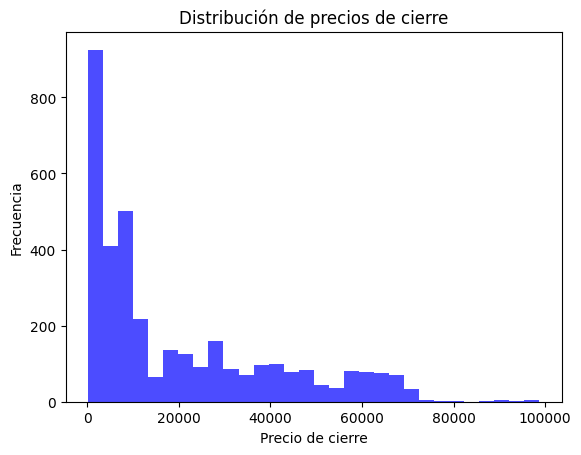

In [2]:
import matplotlib.pyplot as plt

# Histograma de precios de cierre
plt.hist(df['close'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de precios de cierre')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()

Observa cómo cambian los precios a lo largo del tiempo.

In [ ]:
# Convertir la columna de fecha al tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Graficar los precios de cierre
plt.plot(df['date'], df['close'], label='Precio de cierre', color='orange')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

Correlaciones entre variables: Usa un mapa de calor para visualizar correlaciones.

In [ ]:
import seaborn as sns

# Calcular matriz de correlación
corr_matrix = df[['open', 'high', 'low', 'close', 'Volume USD', 'Volume Cripto']].corr()

# Crear un mapa de calor
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


### **Paso 4: Detectar valores atípicos**

**Boxplots:** Identifica outliers en precios o volúmenes.

In [ ]:
# Boxplot para los precios de cierre
sns.boxplot(x=df['close'], color='green')
plt.title('Boxplot de precios de cierre')
plt.show()

### **Paso 5: Análisis temporal**

**Graficar volatilidad diaria:** Calcula la volatilidad (high - low)/open y grafícala.

In [ ]:
# Calcular volatilidad diaria
df['volatility'] = (df['high'] - df['low']) / df['open']

# Graficar volatilidad
plt.plot(df['date'], df['volatility'], label='Volatilidad', color='red')
plt.title('Volatilidad diaria')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()
plt.show()
